In [71]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras import Sequential
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [35]:
train_data_path="E:/preprocessed images/Adaptive histogram dataset/adap hist(2)/preprocessed train data"
val_data_path="E:/preprocessed images/Adaptive histogram dataset/adap hist(2)/preprocessed val data"
test_data_path="E:/preprocessed images/Adaptive histogram dataset/adap hist(2)/preprocessed test data"

In [36]:
train_gen=ImageDataGenerator(rescale=1./255)
val_gen=ImageDataGenerator(rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)

In [37]:
train_data=train_gen.flow_from_directory(
                                
                                        train_data_path,
                                        class_mode="categorical",
                                        batch_size=32,
                                        color_mode="grayscale",
                                        target_size=(112,112),
                                        shuffle=True,
                                                                        
                                         
                                        )

val_data=val_gen.flow_from_directory(
                                        val_data_path,
                                        class_mode="categorical",
                                        color_mode="grayscale",
                                        batch_size=32,
                                        target_size=(112,112),
                                        shuffle=False
                                        )

test_data=test_gen.flow_from_directory(
                                        test_data_path,
                                        class_mode="categorical",
                                        batch_size=32,
                                        color_mode="grayscale",
                                        target_size=(112,112),
                                        shuffle=False
                                        )

Found 5778 images belonging to 2 classes.
Found 826 images belonging to 2 classes.
Found 1656 images belonging to 2 classes.


In [6]:
cnn_2=load_model("E:/saved models/finalize models for project/Model_5_classes/CNN_Model_5_classes.h5")

In [143]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 64)        18496     
                                                        

In [144]:
for layer in cnn_2.layers:
    layer.trainable = False

In [145]:
pretrained_output = cnn_2.layers[-2].output

In [146]:
x = Dense(512, activation='relu')(pretrained_output)
x = Dense(256, activation='relu')(x)

predictions = Dense(2, activation='softmax')(x)

In [147]:
cnn_2=Model(inputs=cnn_2.input, outputs=predictions)

In [148]:
cnn_2.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 112, 112, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                          

In [153]:
cnn_2.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='binary_crossentropy', metrics=['accuracy'])

In [154]:
cnn_2.fit(train_data, epochs=20, batch_size=32, validation_data=val_data)

Epoch 1/20
181/181 [==============================] - 237s 1s/step - loss: 0.4804 - accuracy: 0.7722 - val_loss: 0.4416 - val_accuracy: 0.7954
Epoch 2/20
181/181 [==============================] - 220s 1s/step - loss: 0.4423 - accuracy: 0.7927 - val_loss: 0.4479 - val_accuracy: 0.7833
Epoch 3/20
181/181 [==============================] - 220s 1s/step - loss: 0.4367 - accuracy: 0.7977 - val_loss: 0.4380 - val_accuracy: 0.8027
Epoch 4/20
181/181 [==============================] - 220s 1s/step - loss: 0.4285 - accuracy: 0.7991 - val_loss: 0.4470 - val_accuracy: 0.7954
Epoch 5/20
181/181 [==============================] - 223s 1s/step - loss: 0.4312 - accuracy: 0.8025 - val_loss: 0.4413 - val_accuracy: 0.8027
Epoch 6/20
181/181 [==============================] - 216s 1s/step - loss: 0.4278 - accuracy: 0.8046 - val_loss: 0.4343 - val_accuracy: 0.7990
Epoch 7/20
181/181 [==============================] - 222s 1s/step - loss: 0.4251 - accuracy: 0.8044 - val_loss: 0.4385 - val_accuracy: 0.7978

In [38]:
cnn_2=load_model("E:/finalize models for project/CNN/Binary/CNN_binary_classes.h5")

In [54]:
# Load your pre-trained CNN model
CNN = cnn_2

# Create a new model with the modified architecture
feature_extractor = Model(inputs=CNN.input, outputs=CNN.layers[-2].output)

In [55]:
# Extract deep features
test_deep_features = feature_extractor.predict(test_data)
print(feature_extractor.output_shape)

52/52 [==============================] - 15s 295ms/step
(None, 256)


In [56]:
predicted_labels = test_deep_features.argmax

In [57]:
scaler = MinMaxScaler()
test_normalized_features = scaler.fit_transform(test_deep_features)

In [58]:
N_components = 0.99  


pca = PCA(n_components=N_components)
test_reduced_features = pca.fit_transform(test_normalized_features)

In [59]:
x=test_reduced_features
y=test_data.classes

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [117]:
# Create an SVM classifier
svm_classifier = SVC(C=1000,gamma=0.009)


svm_classifier.fit(x_train,y_train)


y_pred = svm_classifier.predict(x_test)

actual_class_labels = ['Negative','Positive']

# Evaluate the performance of the SVM classifier
report = classification_report(y_test, y_pred, target_names=actual_class_labels)

custom_title = "\n CNN BINARYCLASS CLASSIFICATION\n\n"
report_with_title = custom_title + report

print(report_with_title)


 CNN BINARYCLASS CLASSIFICATION

              precision    recall  f1-score   support

    Negative       0.76      0.91      0.83       185
    Positive       0.85      0.63      0.72       147

    accuracy                           0.79       332
   macro avg       0.80      0.77      0.77       332
weighted avg       0.80      0.79      0.78       332



52/52 [==============================] - 37s 707ms/step


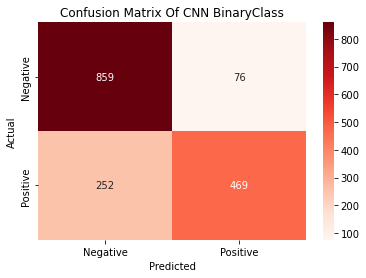

In [120]:
predictions = cnn_2.predict(test_data)
predicted_labels = predictions.argmax(axis=1)

true_labels = test_data.classes

cm = confusion_matrix(true_labels, predicted_labels)
classes = ['Negative', 'Positive']

plt.figure()
ax = plt.subplot()
ax.set_title('Confusion Matrix Of CNN BinaryClass')

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Reds')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

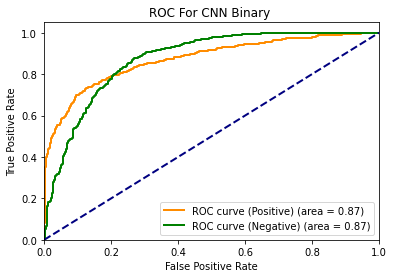

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


predicted_probabilities = predictions 

true_labels = test_data.classes

# Calculate ROC curve for class "Positive"
fpr_positive, tpr_positive, _ = roc_curve(true_labels, predicted_probabilities[:, 1], pos_label=1)
roc_auc_positive = auc(fpr_positive, tpr_positive)

# Calculate ROC curve for class "Negative"
fpr_negative, tpr_negative, _ = roc_curve(true_labels, predicted_probabilities[:, 0], pos_label=0)
roc_auc_negative = auc(fpr_negative, tpr_negative)

# Plot ROC curves
plt.figure()
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=2, label='ROC curve (Positive) (area = %0.2f)' % roc_auc_positive)
plt.plot(fpr_negative, tpr_negative, color='green', lw=2, label='ROC curve (Negative) (area = %0.2f)' % roc_auc_negative)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC For CNN Binary ')
plt.legend(loc="lower right")
plt.show()
